In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler

# HW 2
## 1. k-Means

In [12]:
def kMeans(df, k, vis=False):
    
    def visualise(df, cnt):
        colors = {0:'orange', 1:'blue', 2:'green', 3:'black', 4: 'cyan'}
        if 'cl' in df.columns:
            ax = df.plot(kind='scatter',x= 0,y= 1, c=df['cl'].apply(lambda x: colors[x]))
        else:
            ax = df.plot(kind='scatter',x= 0,y= 1, color='black')
        cnt.plot(ax = ax, kind='scatter',x = 0 ,y = 1,color = 'red', marker = '*', s = 200)
        plt.show()
    
    def centroids_init(df, k):
        cnt_coord = np.zeros((k, df.shape[1]))
        for i in range(k):
            for j in range(df.shape[1]):
                cnt_coord[i][j] = np.random.uniform(df.iloc[:, [j]].min(), 
                                                df.iloc[:, [j]].max())
        centroids = pd.DataFrame(cnt_coord)
        return centroids

    def get_dist(a, b):
        """Euclidean distance"""
        return np.linalg.norm(a - b)

    def get_clust(row, cnt):
        distances = cnt.apply(lambda x: get_dist(x.values, row.values), axis = 1)
        return distances.idxmin()
    
    def get_new_clusters(df, cnt):
        if 'cl' in df.columns:
            df_ = df.drop(['cl'], axis = 1)
        else:
            df_ = pd.DataFrame(df)
        clusters = df_.apply(lambda x: get_clust(x, cnt), axis = 1)
        df_['cl'] = clusters
        return df_

    def update_centroids(df, k):
        cnt_coord = np.zeros((k, df.shape[1] - 1))
        for i in range(k):
            for j in range(df.shape[1] - 1):
                cnt_coord[i][j] = df.loc[df['cl'] == i].iloc[:, [j]].mean()
        centroids = pd.DataFrame(cnt_coord)
        return centroids
    

    cnt = centroids_init(df, k)
    if vis: visualise(df, cnt)
    df_ = get_new_clusters(df, cnt)
    cnt_new = update_centroids(df_, k)
    if vis: visualise(df, cnt)
    
    while cnt_new.isna().values.any():
        if vis: print("Bad centroids")
        cnt_new = centroids_init(df.drop(['cl'], axis = 1), k)
        df_ = get_new_clusters(df, cnt_new)
        if vis: visualise(df, cnt_new)
        cnt = cnt_new
        cnt_new = update_centroids(df_, k)
    
    while (cnt != cnt_new).values.any():
        df_ = get_new_clusters(df_, cnt_new)
        cnt = cnt_new
        cnt_new = update_centroids(df_, k)
        if vis: visualise(df_, cnt)
    #print(cnt_new)
    return df

## Blobs dataset

In [53]:
df = pd.read_csv('blobs.csv')
df.head()

,X,Y
0,-0.727696,1.403000
1,-1.875566,0.589247
2,-0.891047,-1.399924
3,-0.224115,0.868289
4,-0.465409,0.306718


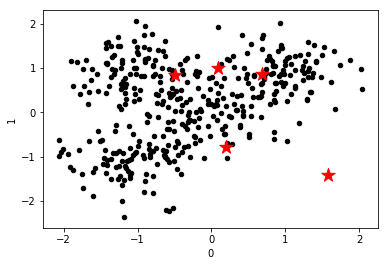

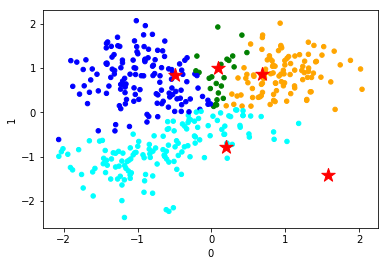

Bad centroids


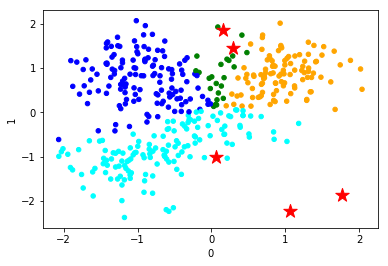

Bad centroids


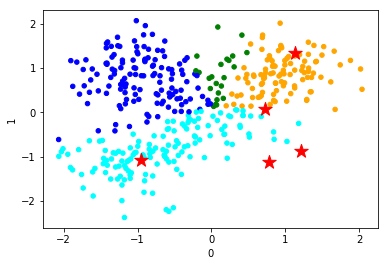

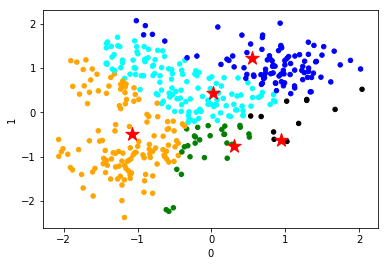

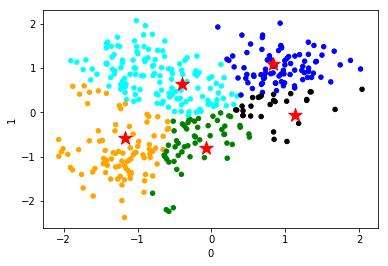

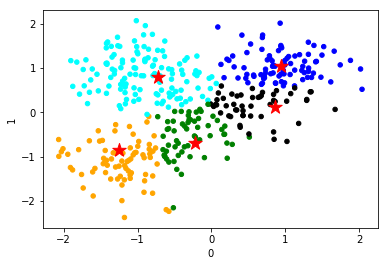

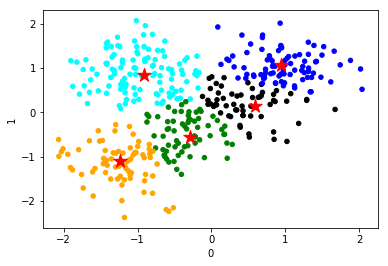

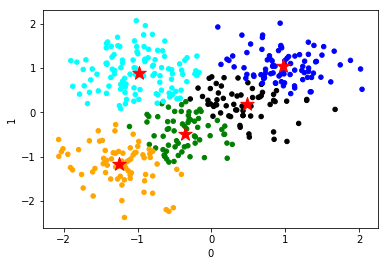

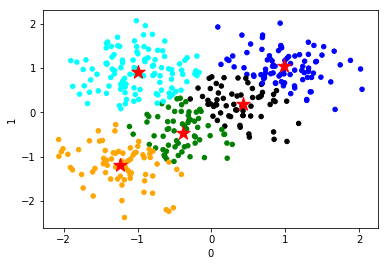

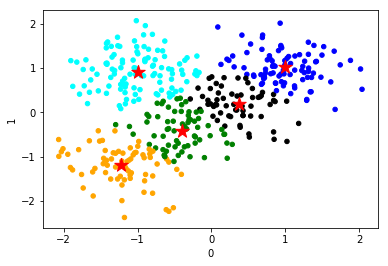

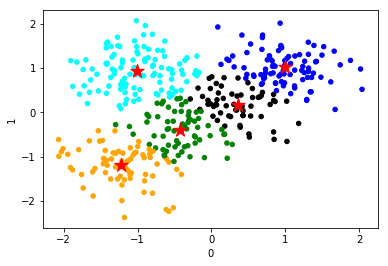

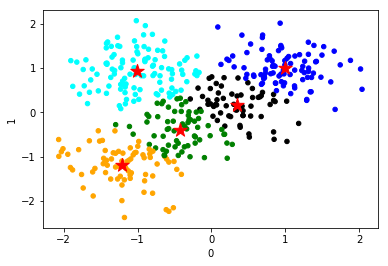

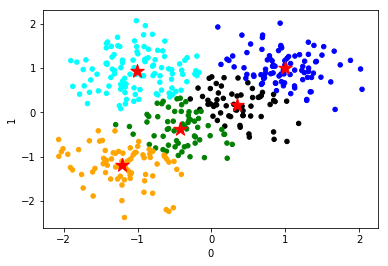

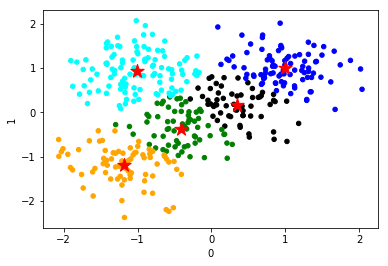

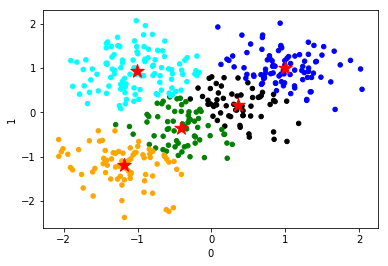

In [529]:
kMeans(df, 5, True)

In [525]:
df.head()

,X,Y
0,-0.727696,1.403000
1,-1.875566,0.589247
2,-0.891047,-1.399924
3,-0.224115,0.868289
4,-0.465409,0.306718


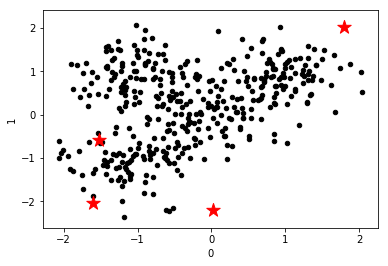

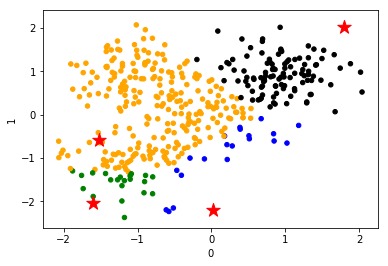

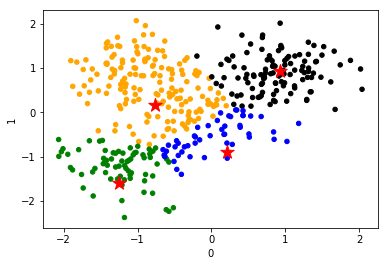

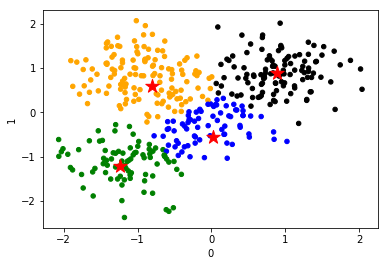

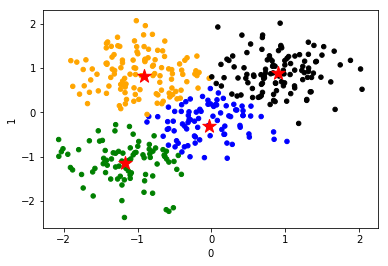

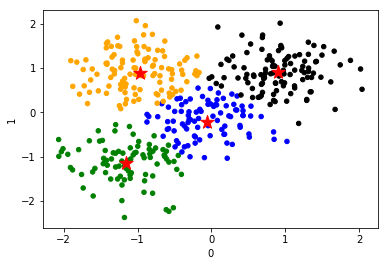

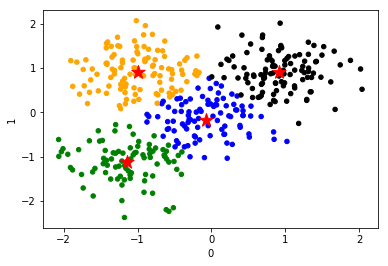

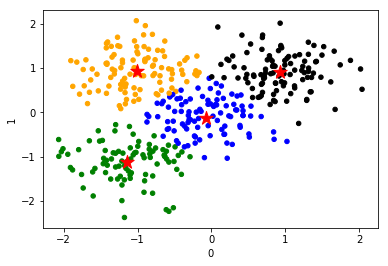

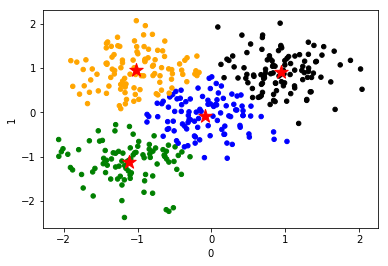

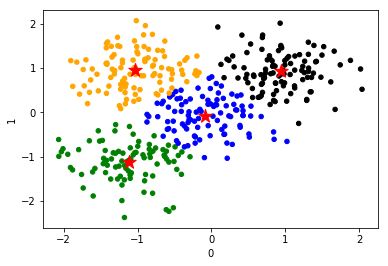

,X,Y,cl
0,-0.727696,1.403000,0
1,-1.875566,0.589247,0
2,-0.891047,-1.399924,2
3,-0.224115,0.868289,0
4,-0.465409,0.306718,0
5,0.170619,0.784912,3
6,-1.352183,-1.049675,0
7,1.409581,1.142748,3
8,-1.228383,0.526654,0
9,1.880161,1.175542,3


In [676]:
df = pd.read_csv('blobs.csv')
kMeans(df, 4, True)

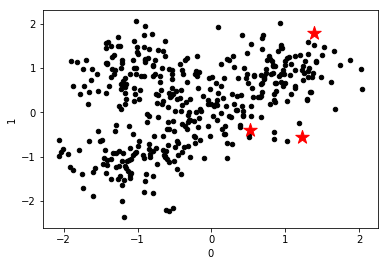

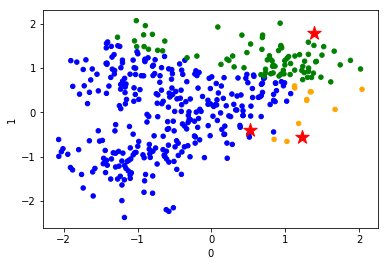

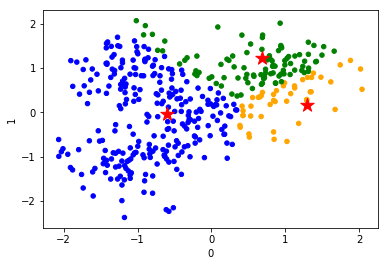

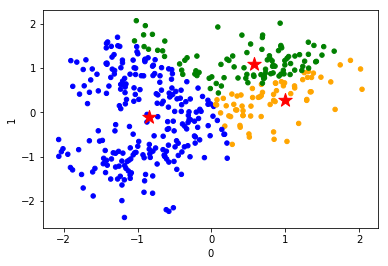

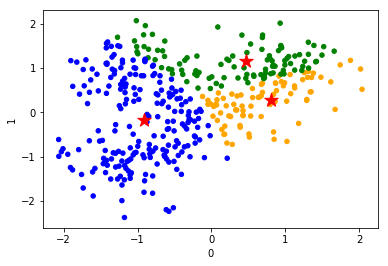

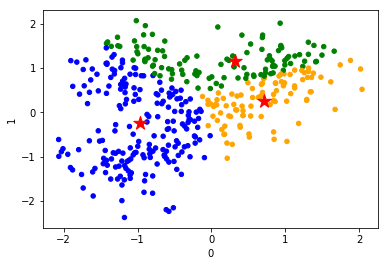

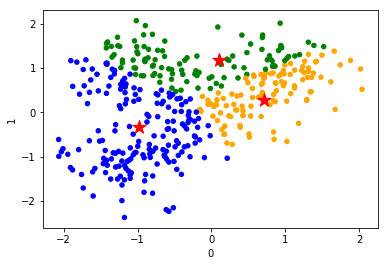

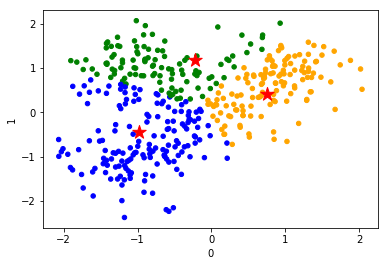

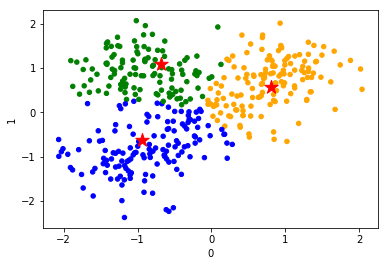

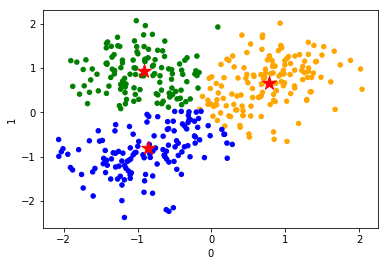

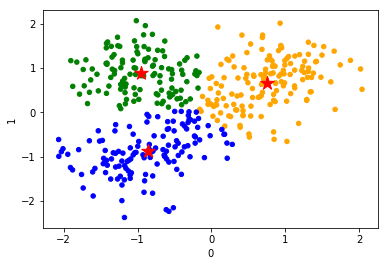

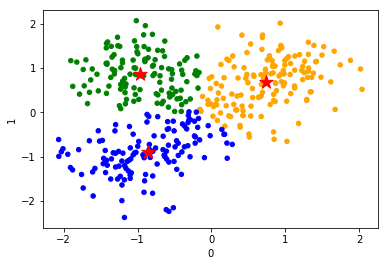

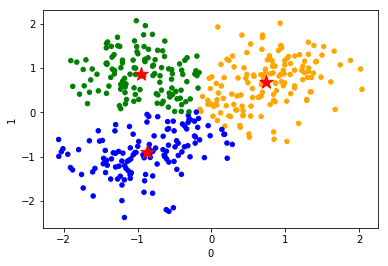

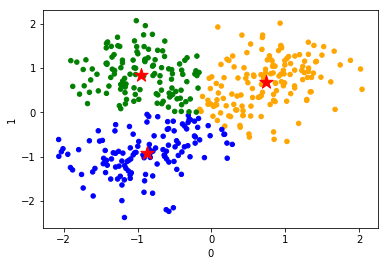

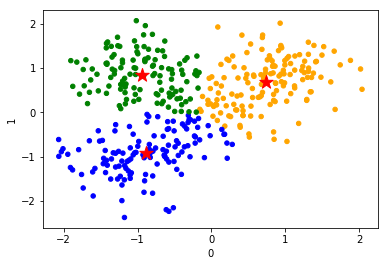

In [519]:
df = pd.read_csv('blobs.csv')
kMeans(df, 3, True)

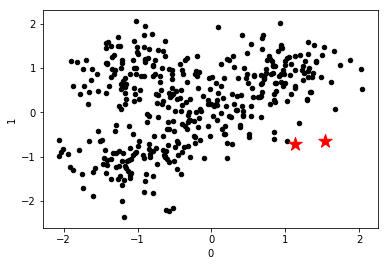

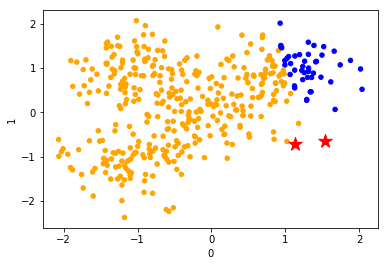

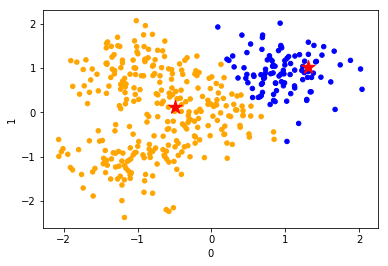

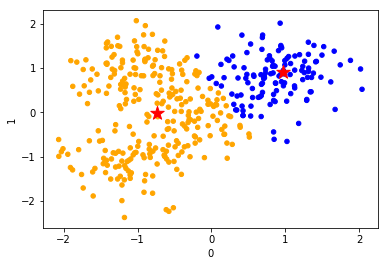

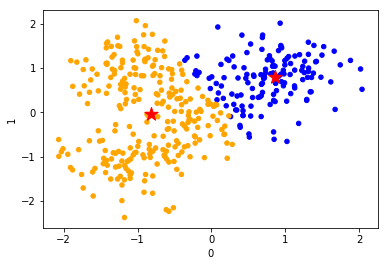

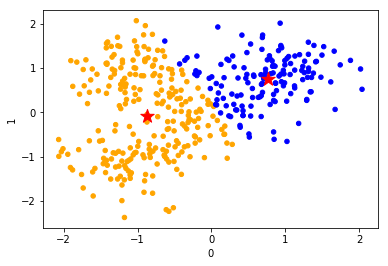

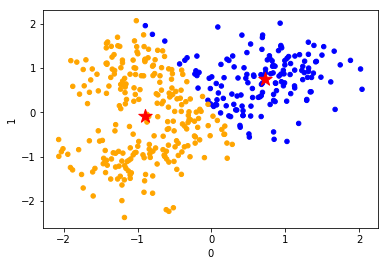

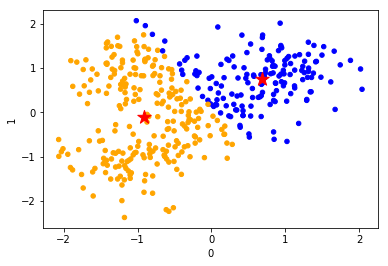

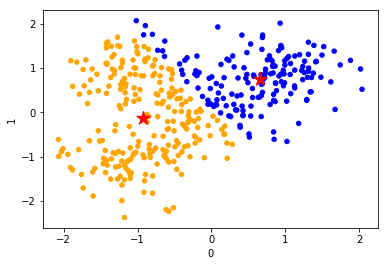

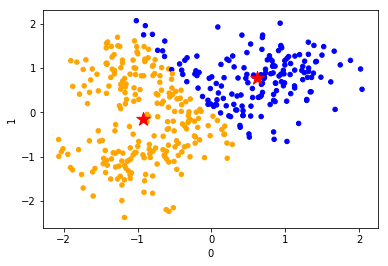

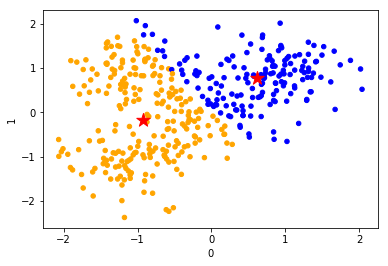

,X,Y,cl
0,-0.727696,1.403000,0
1,-1.875566,0.589247,0
2,-0.891047,-1.399924,0
3,-0.224115,0.868289,0
4,-0.465409,0.306718,0
5,0.170619,0.784912,0
6,-1.352183,-1.049675,0
7,1.409581,1.142748,1
8,-1.228383,0.526654,0
9,1.880161,1.175542,1


In [13]:
df = pd.read_csv('blobs.csv')
kMeans(df, 2, True)

## 2. Cancer dataset

In [72]:
df2 = pd.read_csv('cancer.csv')
df2.shape

(569, 31)

In [82]:
def get_purity(df2, k):
    Y = df2.loc[:,'label']
    X = df2.drop(['label'], axis = 1)
    CL = kMeans(X, k)['cl']
    data = pd.DataFrame({'label': Y,'cl': CL})
    data = data.sort_values(by=['cl'])
    
    est = []
    for i in range(k):
        # print(i, data.loc[data['cl']==i].mode())
        est += [data.loc[data['cl']==i].mode()['label'].values[0]] * sum(data['cl'] == i)
        
    data['est'] = est
    return sum(data['est'] == data['label'])

In [83]:
for j in range(2, 11):
    print(get_purity(df2.copy(), j))

379
498


IndexError: index 0 is out of bounds for axis 0 with size 0

In [75]:
def kMeans2(D, k, vis=False):
    
    df = D.copy()
    
    def visualise(df, cnt):
        colors = {0:'orange', 1:'blue', 2:'green', 3:'black', 4: 'cyan', 5: '#0F0234', 6: '#05430F'}
        if 'cl' in df.columns:
            ax = df.plot(kind='scatter',x= 0,y= 1, c=df['cl'].apply(lambda x: colors[x]))
        else:
            ax = df.plot(kind='scatter',x= 0,y= 1, color='black')
        cnt.plot(ax = ax, kind='scatter',x = 0 ,y = 1,color = 'red', marker = '*', s = 200)
        plt.show()
    
    def centroids_init(df, k):
        N = len(df)
        coords = df.copy()
        cnt_coord = []
        cnt_coord.append(df.iloc[random.randint(0, N)])
        for _ in range(1, k):
            N = len(coords)
            dist = np.zeros(N)
            for i in range(N):
                for j in range(len(cnt_coord)):
                    dist[i] += get_dist(coords.iloc[i], cnt_coord[j])
            ind = np.argmax(dist)
            cnt_coord.append(coords.iloc[ind])
            coords = coords.drop(coords.index[ind])
        centroids = pd.DataFrame(cnt_coord)
        centroids.index = list(range(k))
        return centroids

    def get_dist(a, b):
        """Euclidean distance"""
        return np.linalg.norm(a - b)

    def get_clust(row, cnt):
        distances = cnt.apply(lambda x: get_dist(x.values, row.values), axis = 1)
        return distances.idxmin()
    
    def get_new_clusters(df, cnt):
        if 'cl' in df.columns:
            df = df.drop(['cl'], axis = 1)
        clusters = df.apply(lambda x: get_clust(x, cnt), axis = 1)
        df['cl'] = clusters
        return df

    def update_centroids(df, cnt, k):
        cnt_coord = cnt.copy()
        for i in range(k):
            for j in range(df.shape[1] - 1):
                cnt_coord.iloc[i][j] = df.loc[df['cl'] == i].iloc[:, [j]].mean()
        centroids = cnt_coord
        return centroids
    

    cnt = centroids_init(df, k)
    if vis: visualise(df, cnt)
    df_ = get_new_clusters(df, cnt)
    cnt_new = update_centroids(df_, cnt,  k)
    if vis: visualise(df, cnt)
    
    while (cnt != cnt_new).values.any():
        df_ = get_new_clusters(df_, cnt_new)
        cnt = cnt_new
        cnt_new = update_centroids(df_, cnt, k)
        if vis: visualise(df_, cnt)
    if vis: print("centroids:\n",cnt_new)
    return df

In [100]:
def get_purity(df2, k, norm = False):
    Y = df2.loc[:,'label']
    X = df2.drop(['label'], axis = 1)
    if norm: 
        X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=list(range(1,31)))
    
    CL = kMeans2(X, k)['cl']
    data = pd.DataFrame({'label': Y,'cl': CL})
    data = data.sort_values(by=['cl'])
    
    est = []
    for i in range(k):
        # print(i, data.loc[data['cl']==i].mode())
        est += [data.loc[data['cl']==i].mode()['label'].values[0] for _ in range(sum(data['cl'] == i))]
        
    data['est'] = est
    n = len(Y)
    return sum(data['est'] == data['label'])/n

In [83]:
for j in range(2, 11):
    print(f"numder of clusters : {j}\n purity: {get_purity(df2, j)}")

numder of clusters : 2
 purity: 0.6502636203866432
numder of clusters : 3
 purity: 0.655536028119508
numder of clusters : 4
 purity: 0.6818980667838312
numder of clusters : 5
 purity: 0.6748681898066784
numder of clusters : 6
 purity: 0.6783831282952548
numder of clusters : 7
 purity: 0.7065026362038664
numder of clusters : 8
 purity: 0.7047451669595782
numder of clusters : 9
 purity: 0.8945518453427065
numder of clusters : 10
 purity: 0.9086115992970123


In [ ]:
for j in range(2, 11):
    print(f"numder of clusters : {j}\n purity: {get_purity(df2, j, True)}")

numder of clusters : 2
 purity: 0.6731107205623902
numder of clusters : 3
 purity: 0.6502636203866432
numder of clusters : 4
 purity: 0.6449912126537786
numder of clusters : 5
 purity: 0.7152899824253075


In [1]:
def visualise(df, cnt):
    colors = {0:'orange', 1:'blue', 2:'green', 3:'black', 4: 'cyan'}
    if 'cl' in df.columns:
        ax = df.plot(kind='scatter',x= 0,y= 1, c=df['cl'].apply(lambda x: colors[x]))
    else:
        ax = df.plot(kind='scatter',x= 0,y= 1, color='black')
    cnt.plot(ax = ax, kind='scatter',x = 0 ,y = 1,color = 'red', marker = '*', s = 200)
    plt.show()
    


In [66]:
def centroids_init(df, k):
    N = len(df)
    coords = df.copy()
    cnt_coord = []
    cnt_coord.append(df.iloc[random.randint(0, N)])
    for _ in range(1, k):
        N = len(coords)
        distances = np.zeros(N)
        for i in range(N):
            for j in range(len(cnt_coord)):
                distances[i] += get_dist(coords.iloc[i], cnt_coord[j])
        ind = np.argmax(distances)
        cnt_coord.append(coords.iloc[ind])
        coords = coords.drop(coords.index[ind])
    centroids = pd.DataFrame(cnt_coord)
    return centroids

In [20]:
def get_dist(a, b):
    """Euclidean distance"""
    return np.linalg.norm(a - b)

In [4]:
df = pd.read_csv('cancer.csv')

          1      2       3       4        5        6        7        8  \
182  15.700  20.31  101.20   766.6  0.09597  0.08799  0.06593  0.05189   
461  27.420  26.27  186.90  2501.0  0.10840  0.19880  0.36350  0.16890   
101   6.981  13.43   43.79   143.5  0.11700  0.07568  0.00000  0.00000   
180  27.220  21.87  182.10  2250.0  0.10940  0.19140  0.28710  0.18780   
539   7.691  25.44   48.34   170.4  0.08668  0.11990  0.09252  0.01364   
265  20.730  31.12  135.70  1419.0  0.09469  0.11430  0.13670  0.08646   
538   7.729  25.49   47.98   178.8  0.08098  0.04878  0.00000  0.00000   
212  28.110  18.47  188.50  2499.0  0.11420  0.15160  0.32010  0.15950   

          9       10   ...         21     22      23      24      25      26  \
182  0.1618  0.05549   ...     20.110  32.82  129.30  1269.0  0.1414  0.3547   
461  0.2061  0.05623   ...     36.040  31.37  251.20  4254.0  0.1357  0.4256   
101  0.1930  0.07818   ...      7.930  19.54   50.41   185.2  0.1584  0.1202   
180  0.1800  

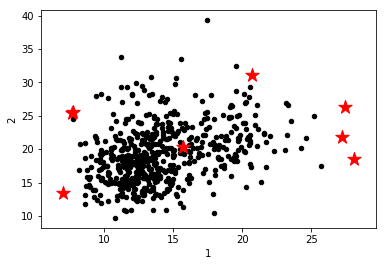

In [71]:
df.head()
X = df.drop(['label'], axis = 1)
cnt = centroids_init(X, 8)
print(cnt)
visualise(X,cnt)

In [17]:
df.iloc[312]


X    -0.795798
Y    -1.823383
cl    0.000000
Name: 312, dtype: float64

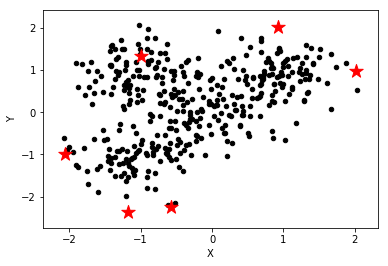

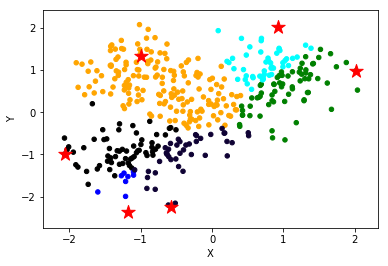

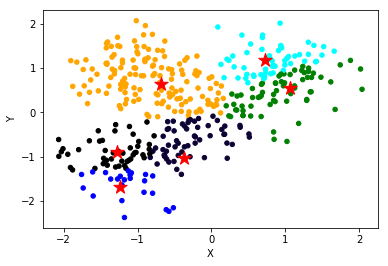

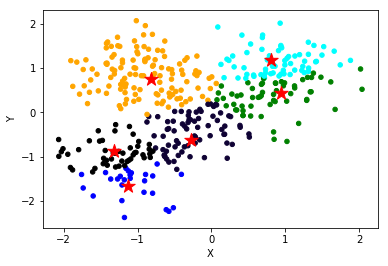

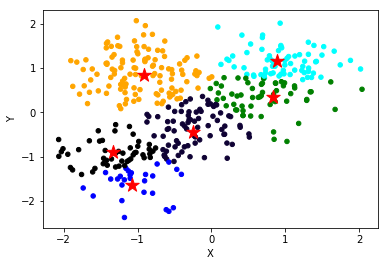

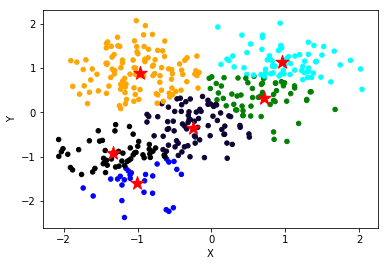

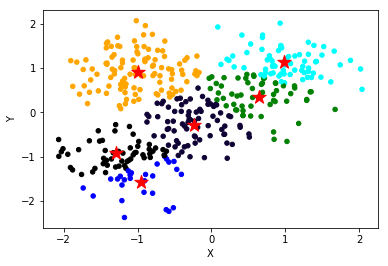

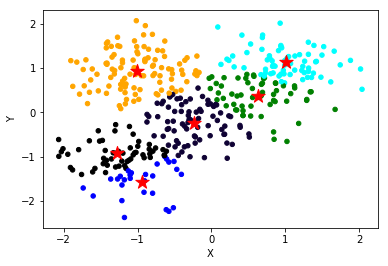

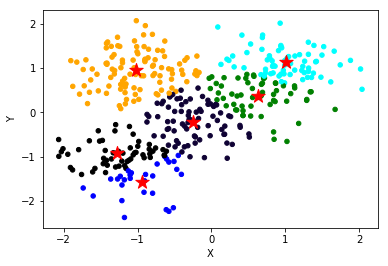

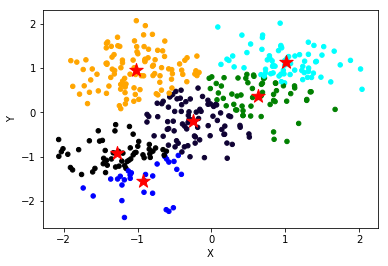

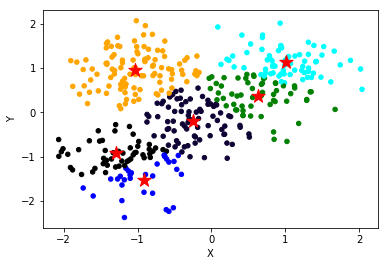

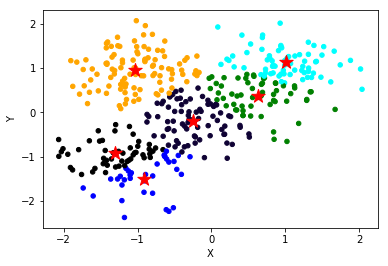

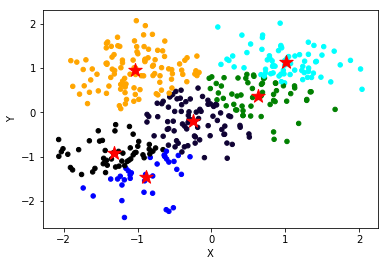

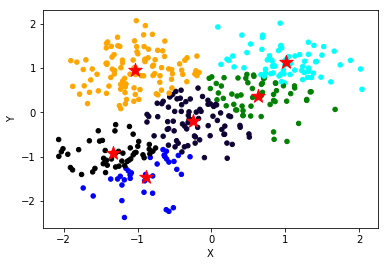

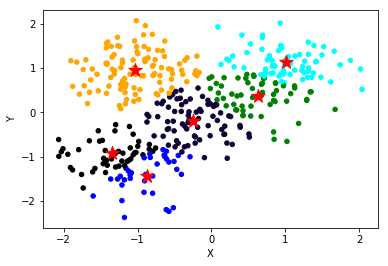

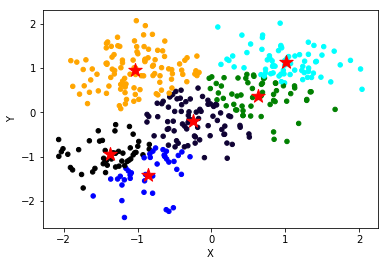

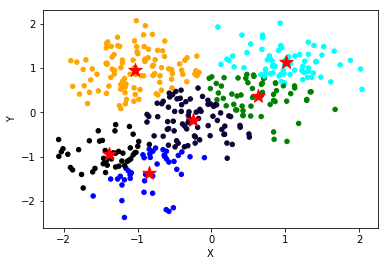

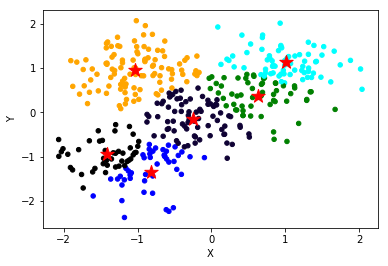

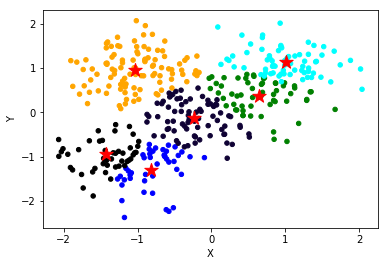

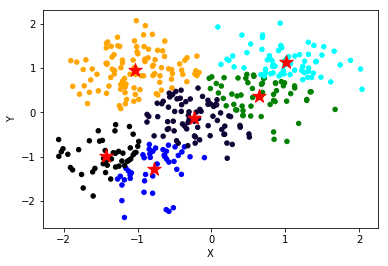

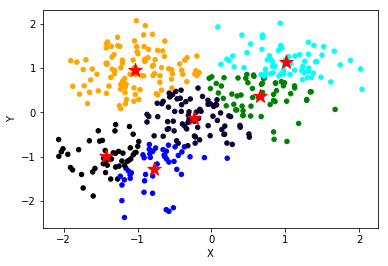

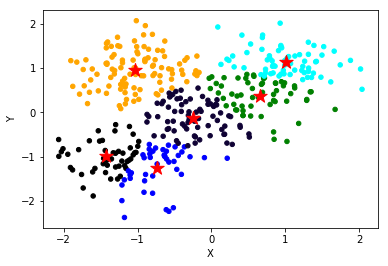

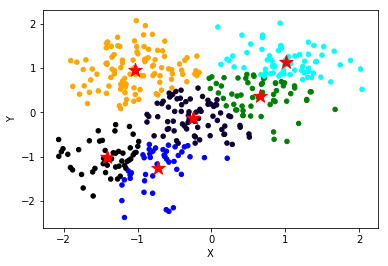

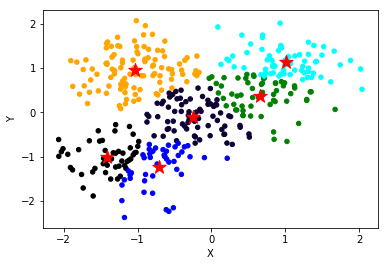

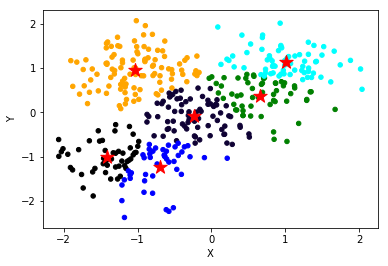

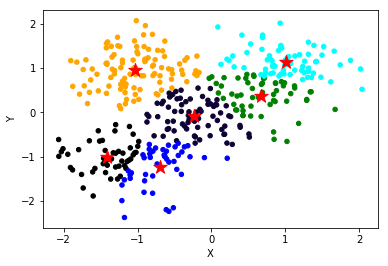

          X         Y
0 -1.033587  0.962339
1 -0.702255 -1.228264
2  0.670230  0.375950
3 -1.417278 -1.001848
4  1.004267  1.148499
5 -0.233112 -0.086725


In [70]:
kMeans2(df,6, True)

In [74]:
df2

,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
